# CREDIT CARD FRAUD ANALYSIS AND MODELING

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')

# Loding The Dataset

In [2]:
credit_dataset=pd.read_csv("C:\\Users\\mevee\\Downloads\\fraudTrain.csv\\fraudTrain.csv")

In [3]:
credit_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
print(credit_dataset.shape)

(1296675, 23)


In [5]:
credit_dataset.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
credit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<AxesSubplot:>

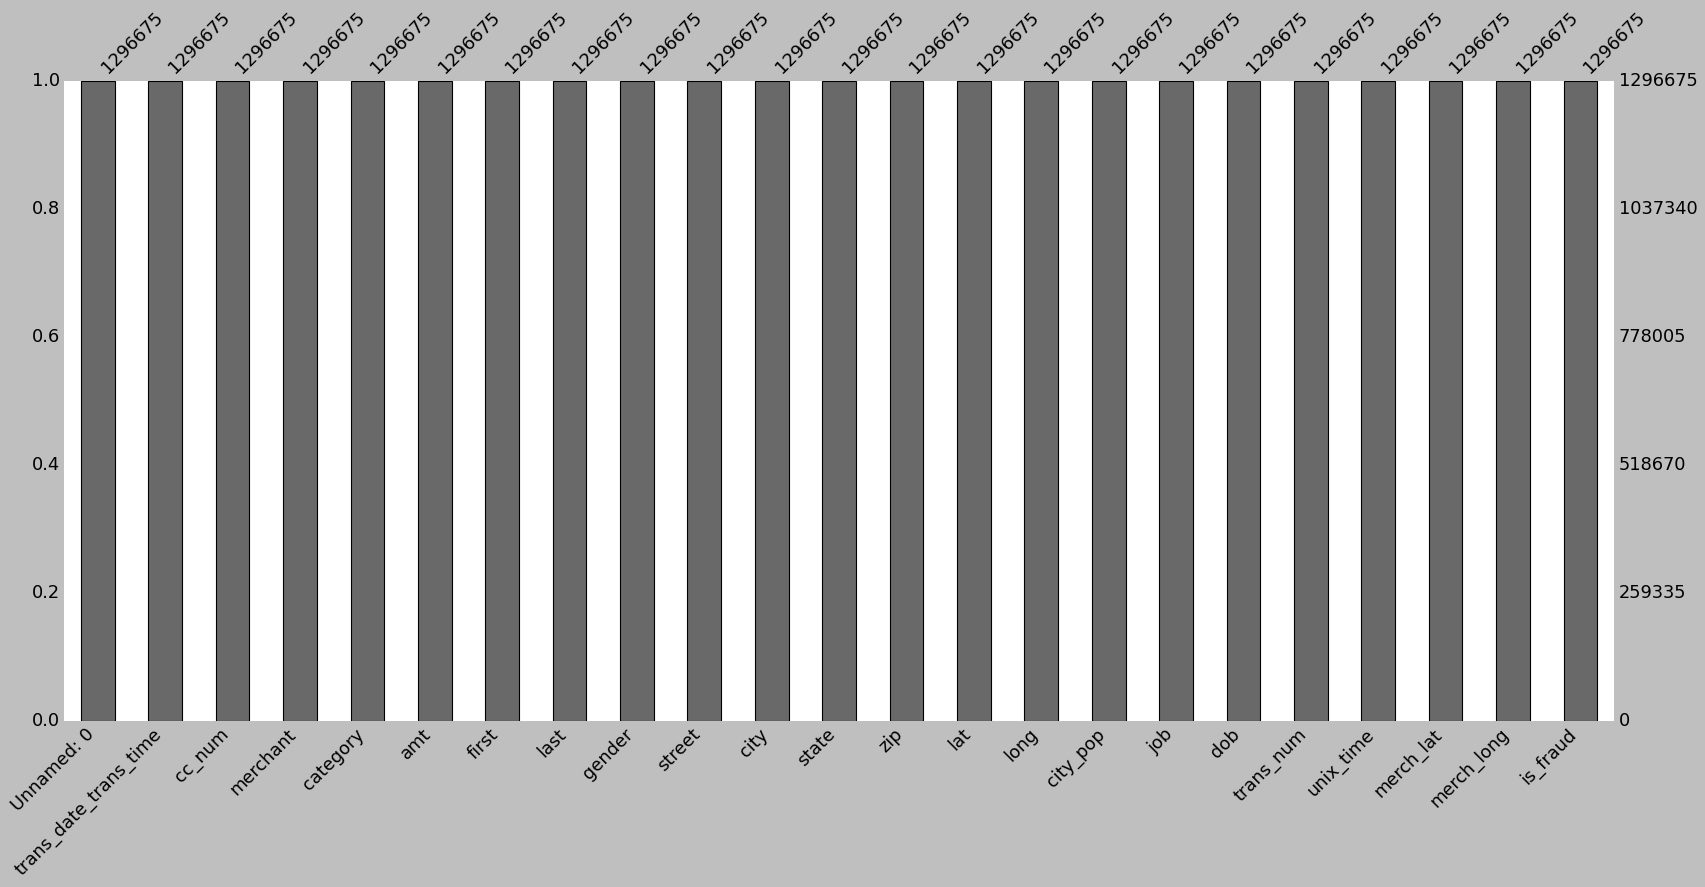

In [7]:
msno.bar(credit_dataset)

# Duplicates

In [8]:
print(credit_dataset.duplicated().sum())

0


# Extract Date Time Componet

In [9]:
credit_dataset['trans_date_trans_time'].dtypes

dtype('O')

In [10]:
credit_dataset['trans_date_trans_time']=pd.to_datetime(credit_dataset['trans_date_trans_time'])
credit_dataset['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1296670   2020-06-21 12:12:08
1296671   2020-06-21 12:12:19
1296672   2020-06-21 12:12:32
1296673   2020-06-21 12:13:36
1296674   2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: datetime64[ns]

In [11]:
credit_dataset['year']=credit_dataset['trans_date_trans_time'].dt.year
credit_dataset['month']=credit_dataset['trans_date_trans_time'].dt.month
credit_dataset['day']=credit_dataset['trans_date_trans_time'].dt.day
credit_dataset['hour']=credit_dataset['trans_date_trans_time'].dt.hour
credit_dataset['minute']=credit_dataset['trans_date_trans_time'].dt.minute
credit_dataset['second']=credit_dataset['trans_date_trans_time'].dt.second


# Calculating Age

In [12]:
credit_dataset['age'] = (pd.to_datetime('today').year - pd.DatetimeIndex(credit_dataset['dob']).year )

# Extracting Numbers From Street Column

In [13]:
credit_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.011293,-82.048315,0,2019,1,1,0,0,18,35
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,49.159047,-118.186462,0,2019,1,1,0,0,44,45
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,43.150704,-112.154481,0,2019,1,1,0,0,51,61
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,47.034331,-112.561071,0,2019,1,1,0,1,16,56
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.674999,-78.632459,0,2019,1,1,0,3,6,37


In [14]:
street_num=[]
for i in credit_dataset['street']:
    i=str(i)
    a=i.split(" ")
    street_num.append(a[0])

In [15]:
#street_num

In [16]:
credit_dataset['street_num']=street_num

In [17]:
print(credit_dataset.street_num.dtypes)

object


In [18]:
credit_dataset['street_num']=credit_dataset['street_num'].astype('int64')

# Finding Outliers

<AxesSubplot:title={'center':'street_num'}>

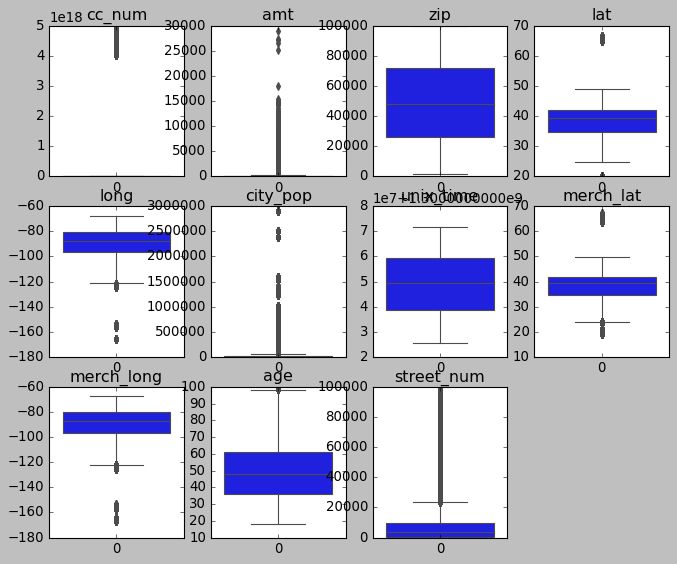

In [19]:
fig = plt.figure(figsize=(10,8))
plt.subplot(3,4,1)
plt.title('cc_num')
sns.boxplot(data = credit_dataset['cc_num'])

plt.subplot(3,4,2)
plt.title('amt')
sns.boxplot(data = credit_dataset['amt'])

plt.subplot(3,4,3)
plt.title('zip')
sns.boxplot(data = credit_dataset['zip'])

plt.subplot(3,4,4)
plt.title('lat')
sns.boxplot(data = credit_dataset['lat'])

plt.subplot(3,4,5)
plt.title('long')
sns.boxplot(data = credit_dataset['long'])

plt.subplot(3,4,6)
plt.title('city_pop')
sns.boxplot(data = credit_dataset['city_pop'])

plt.subplot(3,4,7)
plt.title('unix_time')
sns.boxplot(data = credit_dataset['unix_time'])

plt.subplot(3,4,8)
plt.title('merch_lat')
sns.boxplot(data = credit_dataset['merch_lat'])

plt.subplot(3,4,9)
plt.title('merch_long')
sns.boxplot(data = credit_dataset['merch_long'])

plt.subplot(3,4,10)
plt.title('age')
sns.boxplot(data = credit_dataset['age'])

plt.subplot(3,4,11)
plt.title('street_num')
sns.boxplot(data = credit_dataset['street_num'])


# Drop Unnecessary Columns

In [20]:
credit_dataset.corr()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,age,street_num
Unnamed: 0,1.000000,0.000386,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767,0.783311,0.181956,0.018860,0.001073,0.000030,0.000174,-0.003736,0.000086
cc_num,0.000386,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981,0.000466,-0.000281,0.000545,-0.000801,0.000812,0.000036,-0.000291,-0.012228
amt,-0.000251,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404,0.000842,-0.001748,0.000629,-0.022811,0.000383,0.001405,-0.009748,0.003814
zip,0.000709,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162,0.000086,0.000852,-0.000607,0.005938,0.000766,0.000127,0.011004,-0.018631
lat,0.000602,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894,0.001274,-0.001072,-0.000138,-0.011508,-0.000243,-0.000221,0.047845,-0.072439
long,-0.000676,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721,0.000191,-0.001213,0.000031,-0.002290,-0.000825,0.000325,-0.030231,0.024250
city_pop,-0.001678,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136,-0.001673,0.000137,0.000159,0.020381,-0.000713,0.000690,-0.091271,-0.023934
unix_time,0.998971,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078,0.782582,0.184868,0.017162,0.000756,0.000006,0.000191,-0.003655,0.000058
merch_lat,0.000541,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741,0.001244,-0.001116,-0.000276,-0.011378,-0.000217,-0.000281,0.047458,-0.071931
merch_long,-0.000671,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721,0.000184,-0.001197,0.000076,-0.002325,-0.000820,0.000310,-0.030154,0.024208


In [21]:
credit_dataset=credit_dataset.drop(['Unnamed: 0','cc_num','unix_time','street','city','job','zip','merchant','trans_date_trans_time','dob','first','last','trans_num','street_num'], axis=1)

# Treating Outliers

In [22]:
credit_dataset.amt.describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [23]:
Q1=credit_dataset.amt.quantile(0.25)
Q3=credit_dataset.amt.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-100.58499999999998, 193.375)

In [24]:
credit_dataset=credit_dataset[(credit_dataset['amt']>=-100) & (credit_dataset['amt']<=194)]

In [25]:
Q1=credit_dataset.age.quantile(0.25)
Q3=credit_dataset.age.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-1.5, 98.5)

In [26]:
credit_dataset=credit_dataset[(credit_dataset['age']>=0) & (credit_dataset['age']<=98)]

In [27]:
Q1=credit_dataset.lat.quantile(0.25)
Q3=credit_dataset.lat.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(23.802299999999995, 52.8367)

In [28]:
credit_dataset=credit_dataset[(credit_dataset['lat']>=26) & (credit_dataset['lat']<=53)]

In [29]:
Q1=credit_dataset.long.quantile(0.25)
Q3=credit_dataset.long.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-121.77465000000001, -55.140649999999994)

In [30]:
credit_dataset=credit_dataset[(credit_dataset['long']>=-119) & (credit_dataset['long']<=-55)]

In [31]:
Q1=credit_dataset.city_pop.quantile(0.25)
Q3=credit_dataset.city_pop.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-26282.5, 45785.5)

In [32]:
credit_dataset=credit_dataset[(credit_dataset['city_pop']>=0) & (credit_dataset['city_pop']<=4000)]

# EDA

# Transaction Amount

<AxesSubplot:xlabel='amt', ylabel='Count'>

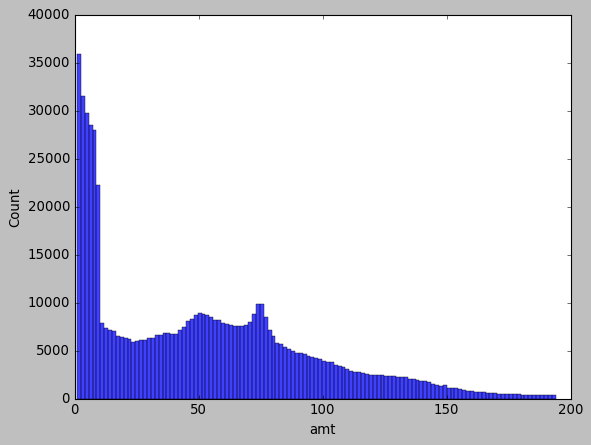

In [33]:
sns.histplot(credit_dataset.amt)

# Credit Card Holder Age

<AxesSubplot:xlabel='age', ylabel='Density'>

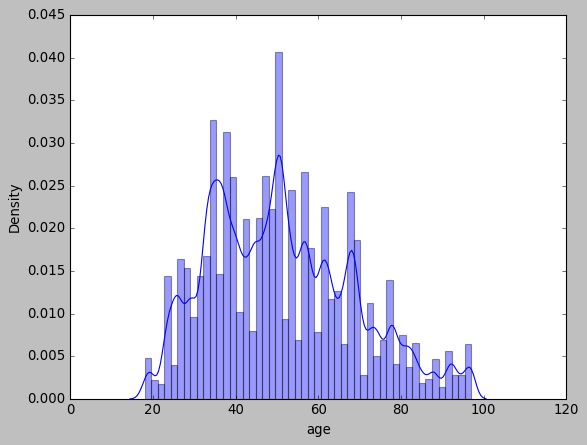

In [34]:
sns.distplot(credit_dataset.age)

# Month Vs Fraud

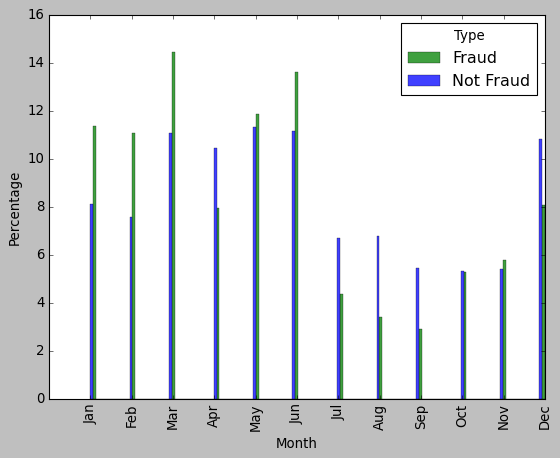

In [35]:
ax=sns.histplot(data=credit_dataset, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(rotation=90)
plt.show()

# Category Vs Fraud

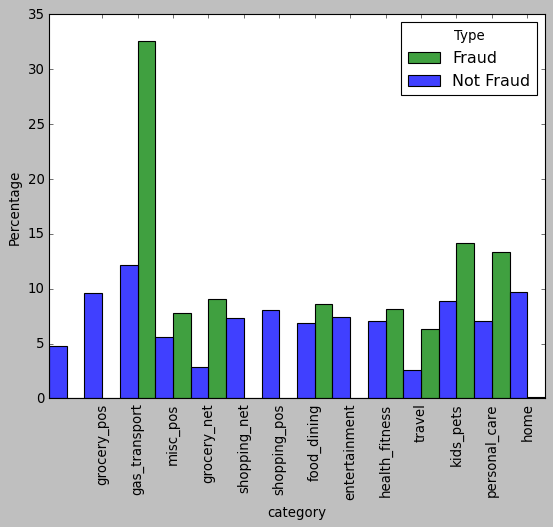

In [36]:
ax=sns.histplot(data=credit_dataset, x="category", hue="is_fraud", stat='percent', multiple='dodge', common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('category')
plt.xticks(np.arange(1,14,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(rotation=90)
plt.show()


# MODEL SELECTION

# Logistic Regression

One Hot Encoding

In [37]:
credit_dataset["gender"]=pd.get_dummies(credit_dataset["gender"],drop_first=True)

Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [40]:
for i in credit_dataset.select_dtypes(include='object'):
    credit_dataset[i]=le.fit_transform(credit_dataset[i])

In [41]:
credit_dataset.head()

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,age
0,8,4.97,0,23,36.0788,-81.1781,3495,36.011293,-82.048315,0,2019,1,1,0,0,18,35
1,4,107.23,0,42,48.8878,-118.2105,149,49.159047,-118.186462,0,2019,1,1,0,0,44,45
3,2,45.00,1,22,46.2306,-112.1138,1939,47.034331,-112.561071,0,2019,1,1,0,1,16,56
4,9,41.96,1,40,38.4207,-79.4629,99,38.674999,-78.632459,0,2019,1,1,0,3,6,37
5,2,94.63,0,34,40.3750,-75.2045,2158,40.653382,-76.152667,0,2019,1,1,0,4,8,62


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

In [44]:
scaler.fit(credit_dataset.drop(columns=['is_fraud']))

StandardScaler()

In [45]:
scaled_features=scaler.transform(credit_dataset.drop(columns=['is_fraud'],axis=1))

In [46]:
x=credit_dataset.drop(['is_fraud'],axis=1)
y=credit_dataset.is_fraud

In [47]:
df=pd.DataFrame(scaled_features,columns=x.columns)

In [48]:
df

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,year,month,day,hour,minute,second,age
0,0.508198,-1.088001,-0.890923,-0.091313,-0.753457,0.694205,2.320458,-0.762158,0.614762,-0.635712,-1.504301,-1.650350,-1.848461,-1.700339,-0.664585,-0.930264
1,-0.526737,1.269302,-0.890923,1.431579,2.112780,-2.654916,-1.070493,2.155286,-2.648962,-0.635712,-1.504301,-1.650350,-1.848461,-1.700339,0.837718,-0.359031
2,-1.044205,-0.165228,1.122431,-0.171466,1.518185,-2.103545,0.743555,1.683819,-2.140919,-0.635712,-1.504301,-1.650350,-1.848461,-1.642644,-0.780147,0.269325
3,0.766932,-0.235306,1.122431,1.271274,-0.229416,0.849324,-1.121165,-0.171090,0.923257,-0.635712,-1.504301,-1.650350,-1.848461,-1.527256,-1.357956,-0.816017
4,-1.044205,0.978846,-0.890923,0.790361,0.207893,1.234443,0.965497,0.267907,1.147213,-0.635712,-1.504301,-1.650350,-1.848461,-1.469562,-1.242394,0.612064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671085,-1.561673,-0.843880,1.122431,1.191122,-0.386769,-2.136455,-0.960029,-0.577990,-2.062320,1.573038,-0.040206,0.613781,-0.091939,-1.008009,-1.242394,0.612064
671086,-1.302939,-0.010779,1.122431,-0.652379,-0.040109,1.025930,-1.120151,-0.119636,0.958111,1.573038,-0.040206,0.613781,-0.091939,-1.008009,-0.606804,-0.416155
671087,-1.302939,1.239334,1.122431,0.309448,-1.455907,-1.534249,-0.310417,-1.292886,-1.469849,1.573038,-0.040206,0.613781,-0.091939,-1.008009,0.144347,0.269325
671088,-1.302939,0.524029,1.122431,0.950665,0.874183,-1.237813,-0.080368,0.741780,-1.299215,1.573038,-0.040206,0.613781,-0.091939,-0.950314,0.375471,-0.473278


In [49]:
from imblearn import over_sampling

In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
rs=RandomOverSampler(random_state=10)

In [52]:
x,y=rs.fit_resample(scaled_features,y)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [55]:
from sklearn.linear_model import LogisticRegression 

In [56]:
lr=LogisticRegression()

In [57]:
lr.fit(x_train,y_train)

LogisticRegression()

In [58]:
pred=lr.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [60]:
print(accuracy_score(pred,y_test)*100)

69.80299597336803


In [61]:
print(confusion_matrix(pred,y_test))

[[128084  48808]
 [ 72606 152575]]


In [62]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68    176892
           1       0.76      0.68      0.72    225181

    accuracy                           0.70    402073
   macro avg       0.70      0.70      0.70    402073
weighted avg       0.71      0.70      0.70    402073



In [63]:
from sklearn.model_selection import KFold,cross_val_score

In [64]:
kf=KFold(n_splits=5)

In [65]:
cv=cross_val_score(lr,x,y,cv=5)

In [66]:
cv

array([0.46259826, 0.65331712, 0.65681147, 0.70624664, 0.51403853])

In [67]:
print(np.mean(cv)*100)

59.8602402617909


# K Nearest Neighbor

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn=KNeighborsClassifier(n_neighbors=3)

In [70]:
knn

KNeighborsClassifier(n_neighbors=3)

In [71]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
pred1=knn.predict(x_test)

In [73]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200316
           1       1.00      1.00      1.00    201757

    accuracy                           1.00    402073
   macro avg       1.00      1.00      1.00    402073
weighted avg       1.00      1.00      1.00    402073



In [74]:
print(accuracy_score(pred1,y_test)*100)

99.90698206544583


In [75]:
print(confusion_matrix(pred1,y_test))

[[200316      0]
 [   374 201383]]


# Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf=RandomForestClassifier(n_estimators=150,criterion='entropy')

In [78]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [79]:
pred2=rf.predict(x_test)

In [80]:
print(confusion_matrix(pred2,y_test))

[[200666      0]
 [    24 201383]]


In [81]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200666
           1       1.00      1.00      1.00    201407

    accuracy                           1.00    402073
   macro avg       1.00      1.00      1.00    402073
weighted avg       1.00      1.00      1.00    402073



In [82]:
print(accuracy_score(pred2,y_test)*100)

99.994030934681
